# Project Overview

## Title: Stock Market Technical Indicators and Trading Decision Tool

### Project Goal
The goal of this project is to develop a Python script that calculates key stock market technical indicators, generates actionable trading decisions based on these indicators, and predicts future trends. This tool will aid in identifying potential buy/sell signals and forecasting short-term price movements.

### Objectives
- Calculate key technical indicators (e.g., Moving Averages, RSI, MACD).
- Generate actionable trading decisions (buy/sell signals).
- Predict future stock price trends based on historical data and indicators.
- Provide visualizations for better understanding and analysis.

### Expected Outcomes
- A comprehensive tool for traders and investors to make informed decisions.
- Enhanced ability to identify market trends and potential trading opportunities.


In [48]:
#Loading Data
import yfinance as yf
import pandas as pd

ticker = "EURINR=X"

start_date = "2023-01-01"
end_date = "2024-09-30"

data = yf.download(ticker, start=start_date, end=end_date)

data


[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,EURINR=X,EURINR=X,EURINR=X,EURINR=X,EURINR=X,EURINR=X
Date,,,,,,
2023-01-02 00:00:00+00:00,88.482002,88.482002,88.400002,87.157700,87.157700,0
2023-01-03 00:00:00+00:00,88.300003,88.300003,88.313004,87.225998,88.292000,0
2023-01-04 00:00:00+00:00,87.219002,87.219002,87.922997,87.219002,87.219002,0
2023-01-05 00:00:00+00:00,87.605003,87.605003,87.807999,86.757004,87.580002,0
2023-01-06 00:00:00+00:00,86.827003,86.827003,87.614998,86.647003,86.819000,0
...,...,...,...,...,...,...
2024-09-23 00:00:00+00:00,93.110001,93.110001,93.202003,92.266701,92.266701,0
2024-09-24 00:00:00+00:00,92.753998,92.753998,93.248001,92.671997,92.775002,0


In [49]:
data.reset_index(inplace=True)
# Rename the columns to flatten the MultiIndex
data.columns = ['Date'] + [f'{price}_{ticker}' for price, ticker in data.columns[1:]]

In [50]:
data.columns

Index(['Date', 'Adj Close_EURINR=X', 'Close_EURINR=X', 'High_EURINR=X',
       'Low_EURINR=X', 'Open_EURINR=X', 'Volume_EURINR=X'],
      dtype='object')

In [51]:
# Define the new simplified column names
new_column_names = ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
data.columns = new_column_names
data

,Date,Adj Close,Close,High,Low,Open,Volume
0,2023-01-02 00:00:00+00:00,88.482002,88.482002,88.400002,87.157700,87.157700,0
1,2023-01-03 00:00:00+00:00,88.300003,88.300003,88.313004,87.225998,88.292000,0
2,2023-01-04 00:00:00+00:00,87.219002,87.219002,87.922997,87.219002,87.219002,0
3,2023-01-05 00:00:00+00:00,87.605003,87.605003,87.807999,86.757004,87.580002,0
4,2023-01-06 00:00:00+00:00,86.827003,86.827003,87.614998,86.647003,86.819000,0
...,...,...,...,...,...,...,...
450,2024-09-23 00:00:00+00:00,93.110001,93.110001,93.202003,92.266701,92.266701,0
451,2024-09-24 00:00:00+00:00,92.753998,92.753998,93.248001,92.671997,92.775002,0
452,2024-09-25 00:00:00+00:00,93.438004,93.438004,93.627998,93.083000,93.490997,0
453,2024-09-26 00:00:00+00:00,93.000999,93.000999,93.467003,92.994003,92.995003,0


In [5]:
data['Date']

0     2023-01-02 00:00:00+00:00
1     2023-01-03 00:00:00+00:00
2     2023-01-04 00:00:00+00:00
3     2023-01-05 00:00:00+00:00
4     2023-01-06 00:00:00+00:00
                 ...           
450   2024-09-23 00:00:00+00:00
451   2024-09-24 00:00:00+00:00
452   2024-09-25 00:00:00+00:00
453   2024-09-26 00:00:00+00:00
454   2024-09-27 00:00:00+00:00
Name: Date, Length: 455, dtype: datetime64[ns, UTC]

In [6]:
data['Volume'].value_counts()

Volume
0    455
Name: count, dtype: int64

In [7]:
data.isnull().sum()

Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   Date       455 non-null    datetime64[ns, UTC]
 1   Adj Close  455 non-null    float64            
 2   Close      455 non-null    float64            
 3   High       455 non-null    float64            
 4   Low        455 non-null    float64            
 5   Open       455 non-null    float64            
 6   Volume     455 non-null    int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 25.0 KB


In [9]:
data.describe()

,Adj Close,Close,High,Low,Open,Volume
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.0
mean,89.720670,89.720670,90.051106,89.390355,89.617281,0.0
std,1.419932,1.419932,1.409361,1.477258,1.487409,0.0
min,86.383003,86.383003,86.615997,85.691902,85.691902,0.0
25%,88.785000,88.785000,89.081501,88.430000,88.655998,0.0
50%,89.622002,89.622002,90.002998,89.386002,89.555000,0.0
75%,90.448002,90.448002,90.785999,90.194500,90.423500,0.0
max,93.722000,93.722000,93.750000,93.504997,93.700996,0.0


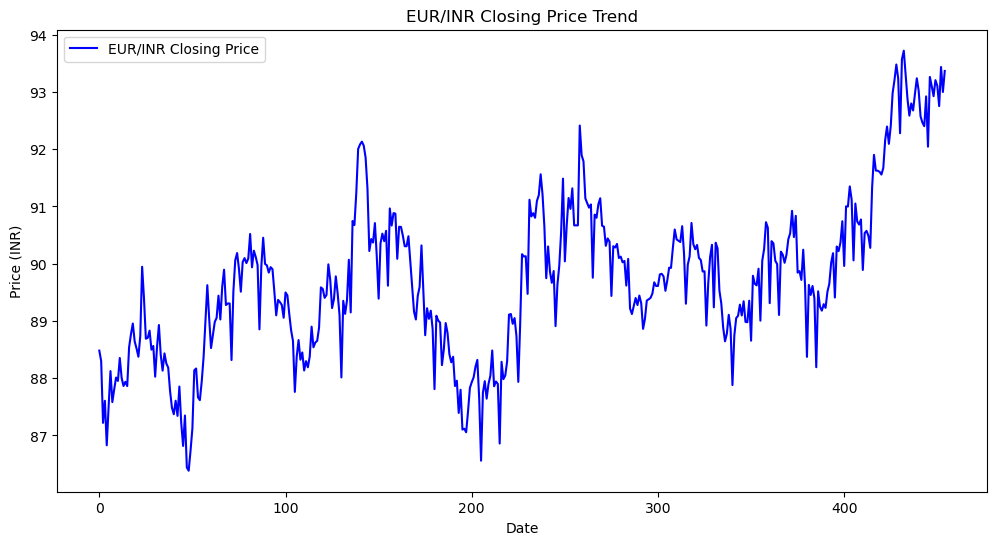

In [10]:
import matplotlib.pyplot as plt
# Plot the closing price over time
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='EUR/INR Closing Price', color='blue')
plt.title('EUR/INR Closing Price Trend')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.show()

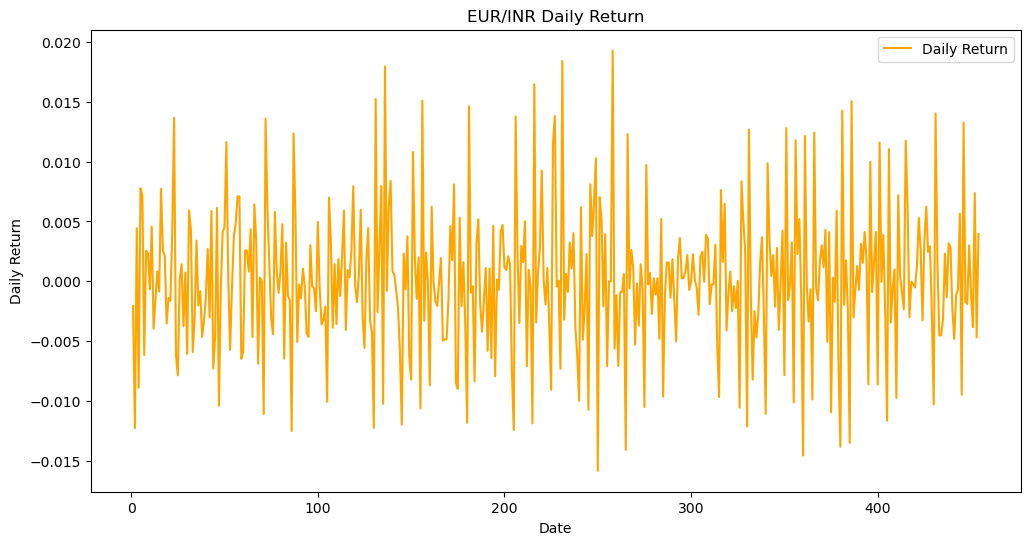

In [11]:
data['Daily Return'] = data['Close'].pct_change()

# Plot daily returns
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Daily Return'], label='Daily Return', color='orange')
plt.title('EUR/INR Daily Return')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()

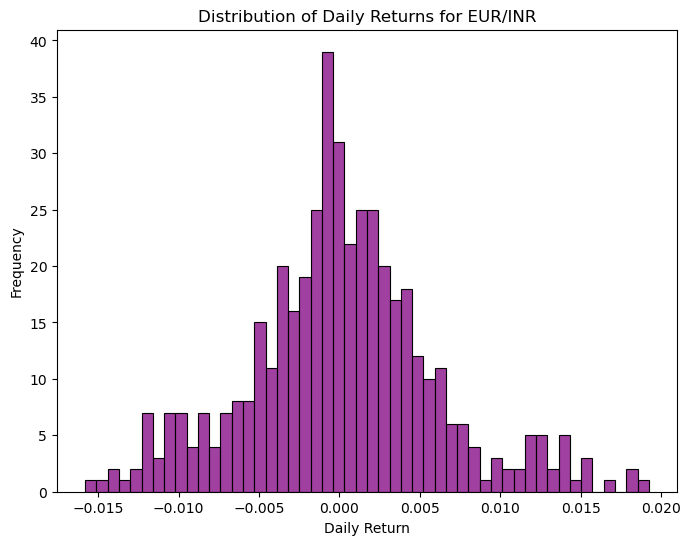

In [12]:
import seaborn as sns
# Distribution plot of daily returns
plt.figure(figsize=(8, 6))
sns.histplot(data['Daily Return'].dropna(), bins=50, color='purple')
plt.title('Distribution of Daily Returns for EUR/INR')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()


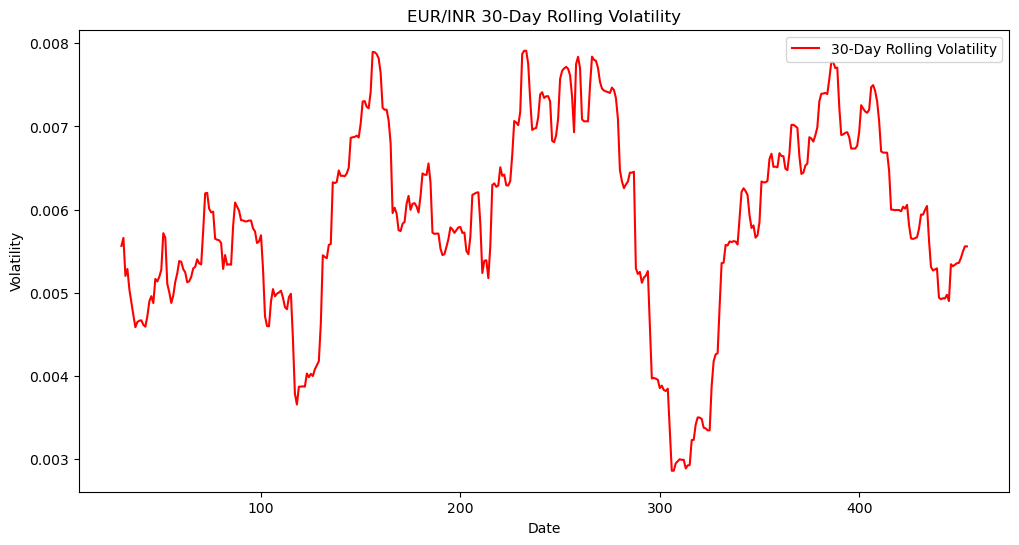

In [13]:
# Calculate rolling volatility 
data['Rolling Volatility'] = data['Daily Return'].rolling(window=30).std()

# Plot rolling volatility
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Rolling Volatility'], label='30-Day Rolling Volatility', color='red')
plt.title('EUR/INR 30-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()


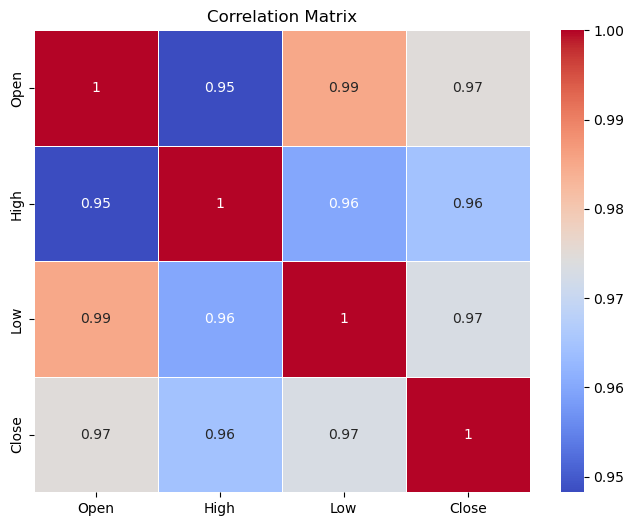

In [14]:
# Correlation matrix
correlation = data[['Open', 'High', 'Low', 'Close']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [15]:
data.columns

Index(['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume',
       'Daily Return', 'Rolling Volatility'],
      dtype='object')

In [16]:
data.columns

Index(['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume',
       'Daily Return', 'Rolling Volatility'],
      dtype='object')

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Function to calculate technical indicators (SMA, Bollinger Bands, CCI) on price data
def calculate_technical_indicators(data):
    data['Date'] = pd.to_datetime(data['Date'])
    data.set_index('Date', inplace=True)

    # Simple Moving Averages
    data['SMA_1'] = data['Close'].rolling(window=1).mean()
    data['SMA_7'] = data['Close'].rolling(window=7).mean()

    # Bollinger Bands
    window = 7
    data['Middle_Band'] = data['Close'].rolling(window=window).mean()
    data['Upper_Band'] = data['Middle_Band'] + (data['Close'].rolling(window=window).std() * 2)
    data['Lower_Band'] = data['Middle_Band'] - (data['Close'].rolling(window=window).std() * 2)

    # Commodity Channel Index (CCI)
    data['Typical_Price'] = (data['Close'] + data['Close'].rolling(window=window).min() + data['Close'].rolling(window=window).max()) / 3
    data['Mean_Deviation'] = data['Typical_Price'].rolling(window=window).apply(lambda x: np.mean(np.abs(x - np.mean(x))), raw=True)
    data['CCI'] = (data['Typical_Price'] - data['Typical_Price'].rolling(window=window).mean()) / (0.015 * data['Mean_Deviation'])

    return data[['Close', 'SMA_1', 'SMA_7', 'Upper_Band', 'Middle_Band', 'Lower_Band', 'CCI', 'Typical_Price']]

# Function to generate decision-making table based on technical indicators
def generate_decision_table(data):
    decisions = {'SMA_1': [], 'Upper_Band': [], 'CCI': []}

    for idx in range(len(data)):
        if idx > 0:
            # SMA decision
            if data['SMA_1'][idx] > data['SMA_7'][idx]:
                decisions['SMA_1'].append('BUY')
            elif data['SMA_1'][idx] < data['SMA_7'][idx]:
                decisions['SMA_1'].append('SELL')
            else:
                decisions['SMA_1'].append('NEUTRAL')

            # Bollinger Band decision
            if data['Close'][idx] > data['Upper_Band'][idx]:
                decisions['Upper_Band'].append('SELL')
            elif data['Close'][idx] < data['Lower_Band'][idx]:
                decisions['Upper_Band'].append('BUY')
            else:
                decisions['Upper_Band'].append('NEUTRAL')

            # CCI decision
            if data['CCI'][idx] > 100:
                decisions['CCI'].append('SELL')
            elif data['CCI'][idx] < -100:
                decisions['CCI'].append('BUY')
            else:
                decisions['CCI'].append('NEUTRAL')
        else:
            for key in decisions:
                decisions[key].append('NEUTRAL')

    return pd.DataFrame(decisions, index=data.index)

# Function to plot and save individual graphs
def plot_indicators(data, output_dir="plots"):
    os.makedirs(output_dir, exist_ok=True)

    # Close Price Plot
    plt.figure(figsize=(10, 6))
    plt.plot(data['Close'], label='Close Price', color='blue')
    plt.title('Close Price')
    plt.legend()
    plt.savefig(f"{output_dir}/close_price.png")
    plt.close()

    # Simple Moving Averages Plot
    plt.figure(figsize=(10, 6))
    plt.plot(data['SMA_1'], label='SMA 1', color='orange')
    plt.plot(data['SMA_7'], label='SMA 7', color='green')
    plt.title('SMA 1 vs SMA 7')
    plt.legend()
    plt.savefig(f"{output_dir}/sma.png")
    plt.close()

    # Bollinger Bands Plot
    plt.figure(figsize=(10, 6))
    plt.plot(data['Upper_Band'], label='Upper Band', color='red')
    plt.plot(data['Lower_Band'], label='Lower Band', color='red')
    plt.plot(data['Middle_Band'], label='Middle Band', color='orange')
    plt.fill_between(data.index, data['Upper_Band'], data['Lower_Band'], color='grey', alpha=0.5)
    plt.title('Bollinger Bands')
    plt.legend()
    plt.savefig(f"{output_dir}/bollinger_bands.png")
    plt.close()

    # CCI Plot
    plt.figure(figsize=(10, 6))
    plt.plot(data['CCI'], label='CCI', color='purple')
    plt.axhline(100, color='red', linestyle='--')
    plt.axhline(-100, color='red', linestyle='--')
    plt.title('CCI')
    plt.legend()
    plt.savefig(f"{output_dir}/cci.png")
    plt.close()

# Function to predict future metrics
def predict_future_metrics(data, target_date, days=7):
    last_date = data.index[-1]
    predicted_data = []

    # Rolling window of the last 7 close prices
    recent_close_prices = list(data['Close'].iloc[-7:])

    for i in range(days):
        date = last_date + pd.Timedelta(days=i+1)
        last_close = recent_close_prices[-1]

        # Basic trend following to estimate future close
        close = last_close * (1 + np.random.normal(0, 0.01))  # assuming minor fluctuations
        recent_close_prices.append(close)
        recent_close_prices.pop(0)  # maintain rolling window

        # Calculate SMA_1 and SMA_7
        sma_1 = close
        sma_7 = np.mean(recent_close_prices)

        # Bollinger Bands calculation
        middle_band = sma_7
        std_dev = np.std(recent_close_prices)
        upper_band = middle_band + (std_dev * 2)
        lower_band = middle_band - (std_dev * 2)

        # Commodity Channel Index (CCI) calculation
        typical_price = close  # Typical price simplification
        mean_typical_price = np.mean(recent_close_prices)
        mean_deviation = np.mean([abs(price - mean_typical_price) for price in recent_close_prices])
        if mean_deviation != 0:
            cci = (typical_price - mean_typical_price) / (0.015 * mean_deviation)
        else:
            cci = 0  # Default to 0 if mean deviation is zero to avoid division by zero

        predicted_data.append({
            'Date': date,
            'Close': close,
            'SMA_1': sma_1,
            'SMA_7': sma_7,
            'Upper_Band': upper_band,
            'Middle_Band': middle_band,
            'Lower_Band': lower_band,
            'CCI': cci
        })

    return pd.DataFrame(predicted_data).set_index('Date')


if __name__ == "__main__":
    # Calculate indicators and generate decisions
    all_indicators = calculate_technical_indicators(data)
    decision_table = generate_decision_table(all_indicators)

    # Save decision table as CSV
    decision_table.to_csv("decision_table4.csv")
    print("Decision Table saved as 'decision_table4.csv'.")

    # Predict future metrics for one day and one week
    # Ensure timezone awareness
    target_date = pd.to_datetime('2024-09-30').tz_localize('UTC')  
    
    predicted_one_day = predict_future_metrics(all_indicators, target_date, days=1)
    predicted_one_day.to_csv("predicted_one_day.csv")
    print("\nPredicted Metrics for One Day (Sept 30, 2024):")
    print(predicted_one_day)

    predicted_one_week = predict_future_metrics(all_indicators, target_date, days=7)
    predicted_one_week.to_csv("predicted_one_week.csv")

    generate_decision_table = generate_decision_table(predicted_one_week)
    generate = generate_decision_table.join(predicted_one_week, lsuffix='_gen', rsuffix='_pred')

# Save the resulting DataFrame to an Excel file
    generate.to_excel("generate.xlsx", index=False)

# Plot indicatoes
    plot_indicators(predicted_one_week)
    print("Individual graphs saved in the 'plots' directory.")
    
    print("\nPredicted Metrics for One Week (Sept 30, 2024 to Oct 7, 2024):")
    print(predicted_one_week)


C:\Users\aksha\AppData\Local\Temp\ipykernel_15592\1074316848.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if data['SMA_1'][idx] > data['SMA_7'][idx]:
C:\Users\aksha\AppData\Local\Temp\ipykernel_15592\1074316848.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif data['SMA_1'][idx] < data['SMA_7'][idx]:
C:\Users\aksha\AppData\Local\Temp\ipykernel_15592\1074316848.py:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if d

Decision Table saved as 'decision_table4.csv'.

Predicted Metrics for One Day (Sept 30, 2024):
                               Close      SMA_1      SMA_7  Upper_Band  \
Date                                                                     
2024-09-28 00:00:00+00:00  92.667618  92.667618  93.078088   93.618429   

                           Middle_Band  Lower_Band         CCI  
Date                                                            
2024-09-28 00:00:00+00:00    93.078088   92.537747 -118.002239  


C:\Users\aksha\AppData\Local\Temp\ipykernel_15592\1074316848.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if data['SMA_1'][idx] > data['SMA_7'][idx]:
C:\Users\aksha\AppData\Local\Temp\ipykernel_15592\1074316848.py:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if data['Close'][idx] > data['Upper_Band'][idx]:
C:\Users\aksha\AppData\Local\Temp\ipykernel_15592\1074316848.py:45: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  e

Individual graphs saved in the 'plots' directory.

Predicted Metrics for One Week (Sept 30, 2024 to Oct 7, 2024):
                               Close      SMA_1      SMA_7  Upper_Band  \
Date                                                                     
2024-09-28 00:00:00+00:00  93.602389  93.602389  93.211627   93.742137   
2024-09-29 00:00:00+00:00  93.805288  93.805288  93.296953   93.970527   
2024-09-30 00:00:00+00:00  93.183271  93.183271  93.307421   93.971255   
2024-10-01 00:00:00+00:00  92.874115  92.874115  93.324580   93.934311   
2024-10-02 00:00:00+00:00  93.276538  93.276538  93.301514   93.904515   
2024-10-03 00:00:00+00:00  92.404358  92.404358  93.216279   94.078185   
2024-10-04 00:00:00+00:00  92.609788  92.609788  93.107964   94.052945   

                           Middle_Band  Lower_Band         CCI  
Date                                                            
2024-09-28 00:00:00+00:00    93.211627   92.681116  117.875615  
2024-09-29 00:00:00+00:0